# import Libraries

In [1]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

# Load fraudTrain dataset

In [2]:
# My CSV data file
data_file = '/Users/lilianngonadi/Downloads/fraudTrain.csv'

# Read the CSV file into a DataFrame
fraudTrain_data= pd.read_csv(data_file)
fraudTrain_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


# Load fraudTest dataset

In [3]:
# My CSV data file
data_file = '/Users/lilianngonadi/Downloads/fraudTest.csv'

# Read the CSV file into a DataFrame
fraudTest_data= pd.read_csv(data_file)
fraudTest_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# Combining fraudTrain and fraudTest dataset

In [4]:
data = pd.concat([fraudTrain_data, fraudTest_data], axis=0)
data 

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# To view all columns in the dataset

In [5]:
for col in data.columns:
    print(col)

Unnamed: 0
trans_date_trans_time
cc_num
merchant
category
amt
first
last
gender
street
city
state
zip
lat
long
city_pop
job
dob
trans_num
unix_time
merch_lat
merch_long
is_fraud


# To find the unique values in each column

In [6]:
data.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

# To convert date of birth to age for the combined dataset(Fraud train and Fraud test)

In [7]:
# Convert the 'dob' column to datetime format
data['dob'] = pd.to_datetime(data['dob'])

# Calculate age by subtracting the DOB from today's date and converting the result to years
data['age'] = data['dob'].apply(lambda z: (datetime.now() - z).days // 365)

# To convert trans_date_trans_time to is_weekend

In [8]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['day_of_the_week'] = data['trans_date_trans_time'].dt.dayofweek
data['is_weekend'] = data['trans_date_trans_time'].dt.dayofweek >= 5
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,day_of_the_week,is_weekend
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,36,1,False
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,46,1,False
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,62,1,False
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,57,1,False
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,38,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,58,3,False
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,24,3,False
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,42,3,False
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,58,3,False


# To drop multiple columns for the combined dataset(Fraud train and Fraud test)

In [9]:
# Drop columns multiple column 
data  = data .drop(['trans_date_trans_time','Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num', 'unix_time','dob'], axis=1)
data

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,day_of_the_week,is_weekend
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,36,1,False
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,46,1,False
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,62,1,False
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,57,1,False
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,38,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,MO,63453,40.4931,-91.8912,519,Town planner,39.946837,-91.333331,0,58,3,False
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,29.661049,-96.186633,0,24,3,False
555716,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,46.658340,-119.715054,0,42,3,False
555717,fraud_Breitenberg LLC,travel,7.99,M,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,44.470525,-117.080888,0,58,3,False


## Correlation matrix for the dataset

                      amt       zip       lat      long  city_pop  merch_lat  \
amt              1.000000  0.001979 -0.000670 -0.000735  0.004921  -0.000613   
zip              0.001979  1.000000 -0.114554 -0.909795  0.077601  -0.113934   
lat             -0.000670 -0.114554  1.000000 -0.014744 -0.154816   0.993582   
long            -0.000735 -0.909795 -0.014744  1.000000 -0.052359  -0.014585   
city_pop         0.004921  0.077601 -0.154816 -0.052359  1.000000  -0.153863   
merch_lat       -0.000613 -0.113934  0.993582 -0.014585 -0.153863   1.000000   
merch_long      -0.000711 -0.908981 -0.014709  0.999118 -0.052329  -0.014554   
is_fraud         0.209308 -0.002190  0.002904  0.001022  0.000325   0.002778   
age             -0.010655  0.009874  0.047792 -0.028844 -0.093090   0.047415   
day_of_the_week  0.000491 -0.001021  0.000637  0.001157  0.001180   0.000505   

                 merch_long  is_fraud       age  day_of_the_week  
amt               -0.000711  0.209308 -0.010655     

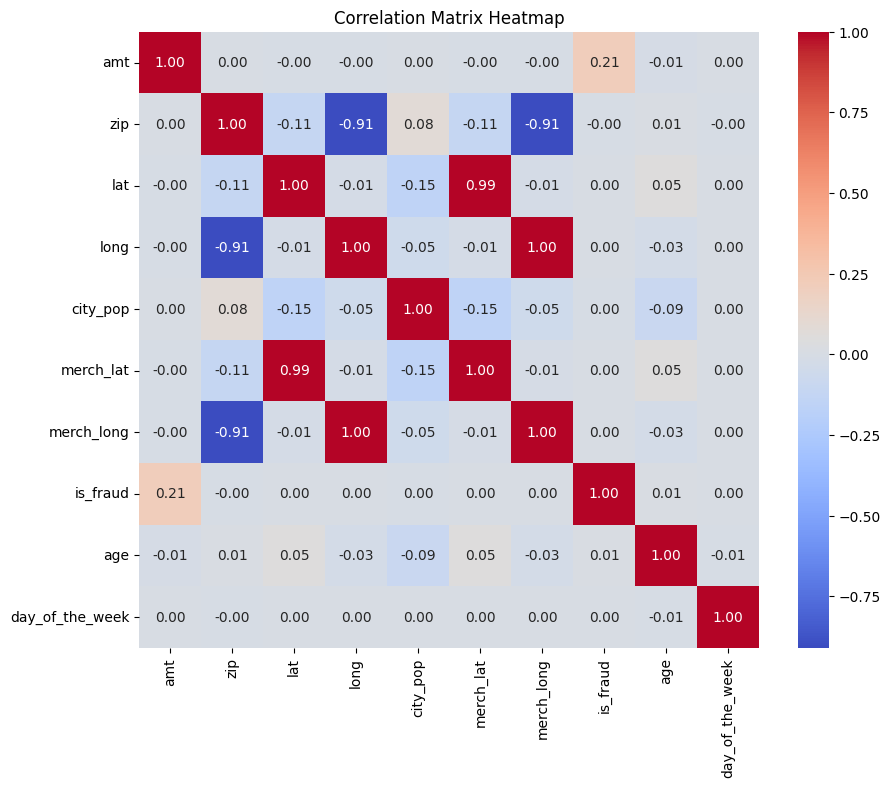

In [10]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()
print(corr_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()



In [11]:
# Drop extra multiple column 
data  = data .drop(['zip', 'lat','long'], axis=1)
data

,merchant,category,amt,gender,city,state,city_pop,job,merch_lat,merch_long,is_fraud,age,day_of_the_week,is_weekend
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",36.011293,-82.048315,0,36,1,False
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,49.159047,-118.186462,0,46,1,False
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,43.150704,-112.154481,0,62,1,False
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,47.034331,-112.561071,0,57,1,False
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,38.674999,-78.632459,0,38,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,MO,519,Town planner,39.946837,-91.333331,0,58,3,False
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,28739,Futures trader,29.661049,-96.186633,0,24,3,False
555716,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,3684,Musician,46.658340,-119.715054,0,42,3,False
555717,fraud_Breitenberg LLC,travel,7.99,M,Mesa,ID,129,Cartographer,44.470525,-117.080888,0,58,3,False


# To convert date of birth to age for Fraud train

In [12]:
# Convert the 'dob' column to datetime format
fraudTrain_data ['dob'] = pd.to_datetime(fraudTrain_data ['dob'])

# Calculate age by subtracting the DOB from today's date and converting the result to years
fraudTrain_data ['age'] = fraudTrain_data ['dob'].apply(lambda z: (datetime.now() - z).days // 365)

# To convert trans_date_trans_time to year, month, day and hour 

In [13]:
fraudTrain_data['trans_date_trans_time'] = pd.to_datetime(fraudTrain_data['trans_date_trans_time'])
fraudTrain_data['day_of_the_week'] = fraudTrain_data['trans_date_trans_time'].dt.dayofweek
fraudTrain_data['is_weekend'] = fraudTrain_data['trans_date_trans_time'].dt.dayofweek >= 5
fraudTrain_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,day_of_the_week,is_weekend
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,36,1,False
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,46,1,False
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,62,1,False
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,57,1,False
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,38,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,62,6,True
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,44,6,True
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,57,6,True
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,44,6,True


# To drop multiple columns for Fraud train

In [14]:
# Drop columns multiple column 
fraudTrain_data  = fraudTrain_data .drop(['trans_date_trans_time','Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num', 'unix_time', 'dob','zip', 'lat','long'], axis=1)
fraudTrain_data

,merchant,category,amt,gender,city,state,city_pop,job,merch_lat,merch_long,is_fraud,age,day_of_the_week,is_weekend
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",36.011293,-82.048315,0,36,1,False
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,49.159047,-118.186462,0,46,1,False
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,43.150704,-112.154481,0,62,1,False
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,47.034331,-112.561071,0,57,1,False
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,38.674999,-78.632459,0,38,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,258,Geoscientist,36.841266,-111.690765,0,62,6,True
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,100,"Production assistant, television",38.906881,-78.246528,0,44,6,True
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,899,Naval architect,33.619513,-105.130529,0,57,6,True
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,1126,Volunteer coordinator,42.788940,-103.241160,0,44,6,True


In [15]:
fraudTrain_data .nunique()

merchant               693
category                14
amt                  52928
gender                   2
city                   894
state                   51
city_pop               879
job                    494
merch_lat          1247805
merch_long         1275745
is_fraud                 2
age                     81
day_of_the_week          7
is_weekend               2
dtype: int64

# Exploratory Data Analysis

In [16]:
print(data.head())

                             merchant       category     amt gender  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                fraud_Lind-Buckridge  entertainment  220.11      M   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                 fraud_Keeling-Crist       misc_pos   41.96      M   

             city state  city_pop                                job  \
0  Moravian Falls    NC      3495          Psychologist, counselling   
1          Orient    WA       149  Special educational needs teacher   
2      Malad City    ID      4154        Nature conservation officer   
3         Boulder    MT      1939                    Patent attorney   
4        Doe Hill    VA        99     Dance movement psychotherapist   

   merch_lat  merch_long  is_fraud  age  day_of_the_week  is_weekend  
0  36.011293  -82.048315         0   36                1       False 

In [17]:
# To get information of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   merchant         object 
 1   category         object 
 2   amt              float64
 3   gender           object 
 4   city             object 
 5   state            object 
 6   city_pop         int64  
 7   job              object 
 8   merch_lat        float64
 9   merch_long       float64
 10  is_fraud         int64  
 11  age              int64  
 12  day_of_the_week  int32  
 13  is_weekend       bool   
dtypes: bool(1), float64(3), int32(1), int64(3), object(6)
memory usage: 192.6+ MB
None


In [18]:
# To get numerical summary of the dataset
print(data.describe())

                amt      city_pop     merch_lat    merch_long      is_fraud  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   7.006357e+01  8.864367e+04  3.853898e+01 -9.022794e+01  5.210015e-03   
std    1.592540e+02  3.014876e+05  5.105604e+00  1.375969e+01  7.199217e-02   
min    1.000000e+00  2.300000e+01  1.902742e+01 -1.666716e+02  0.000000e+00   
25%    9.640000e+00  7.410000e+02  3.474012e+01 -9.689944e+01  0.000000e+00   
50%    4.745000e+01  2.443000e+03  3.936890e+01 -8.744069e+01  0.000000e+00   
75%    8.310000e+01  2.032800e+04  4.195626e+01 -8.024511e+01  0.000000e+00   
max    2.894890e+04  2.906700e+06  6.751027e+01 -6.695090e+01  1.000000e+00   

                age  day_of_the_week  
count  1.852394e+06     1.852394e+06  
mean   5.038313e+01     2.967456e+00  
std    1.743072e+01     2.197983e+00  
min    1.900000e+01     0.000000e+00  
25%    3.700000e+01     1.000000e+00  
50%    4.800000e+01     3.000000e+00  
75%    6.200000

In [19]:
# Distribution of categorical variables
print(data['merchant'].value_counts())
print(data['category'].value_counts())
print(data['gender'].value_counts())
print(data['city'].value_counts())
print(data['state'].value_counts())
print(data['job'].value_counts())
print(data['is_weekend'].value_counts())
print(data['is_fraud'].value_counts())


merchant
fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hahn, Douglas and Schowalter       1091
fraud_Ritchie, Bradtke and Stiedemann    1090
Name: count, Length: 693, dtype: int64
category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64
gender
F    1014749
M     837645
Name: count, dtype: int64
ci

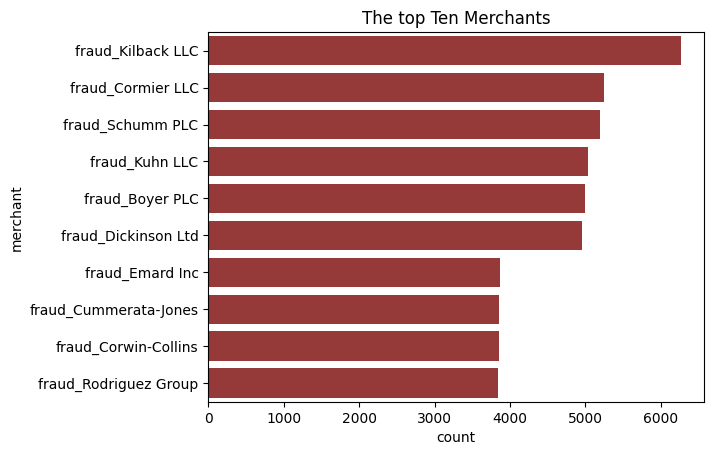

In [20]:
# Bar plot for the top 10 merchants with the highest transaction counts
top_merchants = data['merchant'].value_counts().nlargest(10).index
sns.countplot(data=data[data['merchant'].isin(top_merchants)], y='merchant', order=top_merchants, color='brown')
plt.title('The top Ten Merchants')
plt.show()



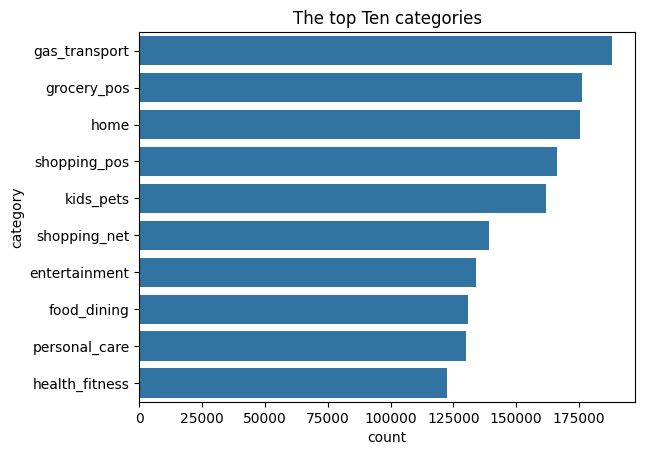

In [21]:
# Bar plot for the top 10 merchants with the highest transaction counts
top_category= data['category'].value_counts().nlargest(10).index
sns.countplot(data=data[data['category'].isin(top_category)], y='category', order=top_category)
plt.title('The top Ten categories')
plt.show()


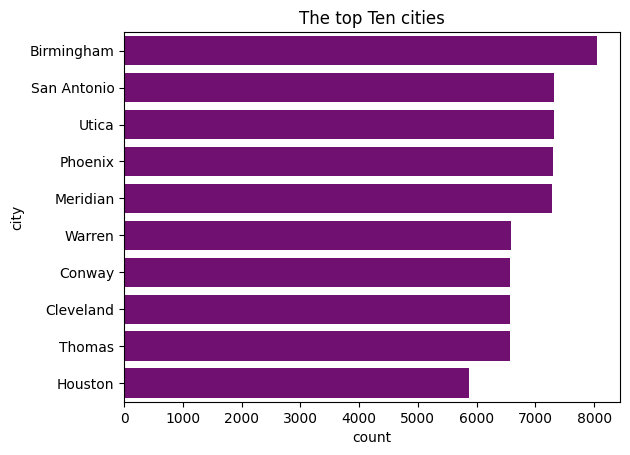

In [22]:
# Bar plot for the top 10 cities with the highest transaction counts
top_city= data['city'].value_counts().nlargest(10).index
sns.countplot(data=data[data['city'].isin(top_city)], y='city', order=top_city, color='purple')
plt.title('The top Ten cities')
plt.show()

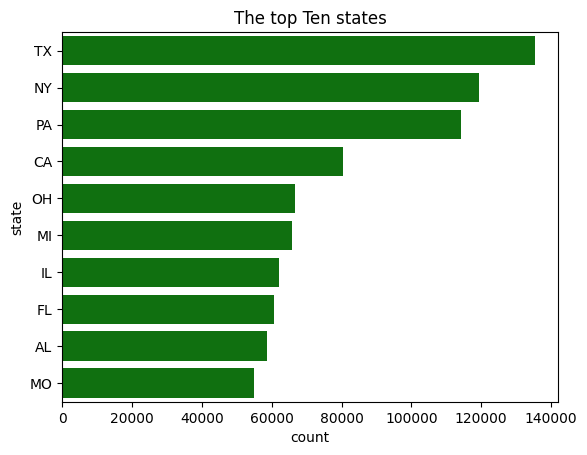

In [23]:
# Bar plot for the top 10 states with the highest transaction counts
top_state= data['state'].value_counts().nlargest(10).index
sns.countplot(data=data[data['state'].isin(top_state)], y='state', order=top_state, color='green')
plt.title('The top Ten states')
plt.show()

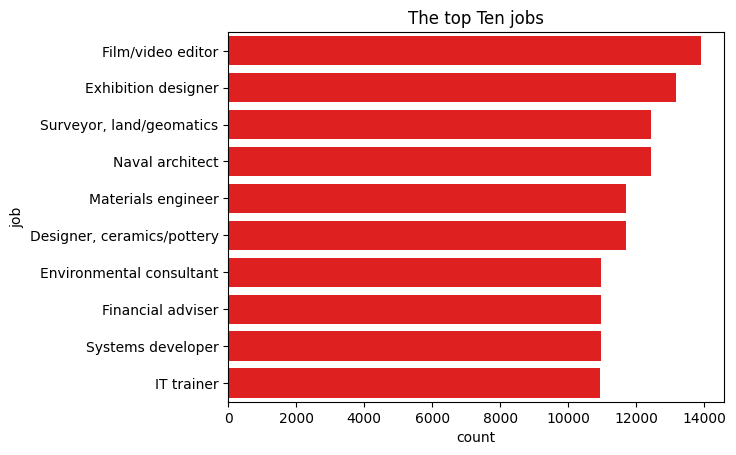

In [24]:
# Bar plot for the top 10 jobs 
top_job= data['job'].value_counts().nlargest(10).index
sns.countplot(data=data[data['job'].isin(top_job)], y='job', order=top_job, color='red')
plt.title('The top Ten jobs')
plt.show()

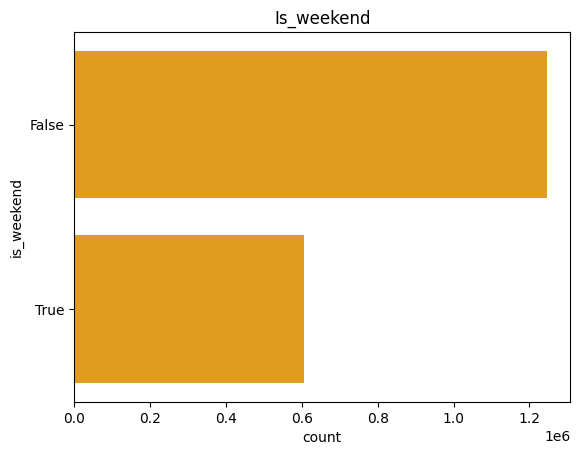

In [25]:
# Bar plot checking if the transaction was made over the weekend or not
top_is_weekend= data['is_weekend'].value_counts().index
sns.countplot(data=data[data['is_weekend'].isin(top_is_weekend)], y='is_weekend', order=top_is_weekend, color='orange')
plt.title('Is_weekend')
plt.show()

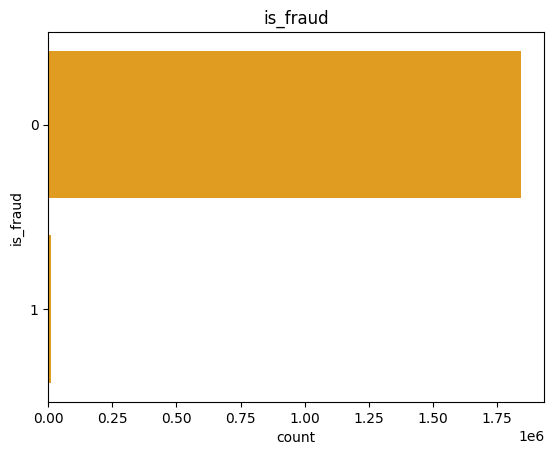

In [26]:
# Bar plot checking if the transaction is fraud or not
top_is_fraud= data['is_fraud'].value_counts().index
sns.countplot(data=data[data['is_fraud'].isin(top_is_fraud)], y='is_fraud', order=top_is_fraud, color='orange')
plt.title('is_fraud')
plt.show()

# To Check for missing values

In [27]:
fraudTrain_data .isnull().sum()

merchant           0
category           0
amt                0
gender             0
city               0
state              0
city_pop           0
job                0
merch_lat          0
merch_long         0
is_fraud           0
age                0
day_of_the_week    0
is_weekend         0
dtype: int64

# Using Label encoding on the categorical variable for the fraud train dataset

In [28]:
# Identify the columns to encode
columns=['merchant', 'category', 'gender', 'city', 'state', 'job', 'is_weekend']

# Initialize the label encoder
label_encoders = {}

# Apply LabelEncoder to each categorical column
for col in columns:
    le = LabelEncoder()
    fraudTrain_data[col] = le.fit_transform(fraudTrain_data[col])
    label_encoders[col] = le

# Working with the fraudTest dataset

# To find the unique values in each column

In [29]:
fraudTest_data .nunique()

Unnamed: 0               555719
trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

In [30]:
# Convert the 'dob' column to datetime format
fraudTest_data ['dob'] = pd.to_datetime(fraudTest_data ['dob'])

# Calculate age by subtracting the DOB from today's date and converting the result to years
fraudTest_data ['age'] = fraudTest_data  ['dob'].apply(lambda z: (datetime.now() - z).days // 365)

# To convert trans_date_trans_time to year, month, day and hour 

In [31]:
fraudTest_data['trans_date_trans_time'] = pd.to_datetime(fraudTest_data['trans_date_trans_time'])
fraudTest_data['day_of_the_week'] = fraudTest_data['trans_date_trans_time'].dt.dayofweek
fraudTest_data['is_weekend'] = fraudTest_data['trans_date_trans_time'].dt.dayofweek >= 5
fraudTest_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,day_of_the_week,is_weekend
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,56,6,True
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,34,6,True
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,53,6,True
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,37,6,True
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,69,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,58,3,False
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,24,3,False
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,42,3,False
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,58,3,False


# To drop multiple columns in Pandas Dataframe

In [32]:
# Drop columns multiple column 
fraudTest_data  = fraudTest_data .drop(['trans_date_trans_time','Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num', 'unix_time','dob','zip', 'lat','long'], axis=1)
fraudTest_data

,merchant,category,amt,gender,city,state,city_pop,job,merch_lat,merch_long,is_fraud,age,day_of_the_week,is_weekend
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,333497,Mechanical engineer,33.986391,-81.200714,0,56,6,True
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,302,"Sales professional, IT",39.450498,-109.960431,0,34,6,True
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,34496,"Librarian, public",40.495810,-74.196111,0,53,6,True
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,54767,Set designer,28.812398,-80.883061,0,37,6,True
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,1126,Furniture designer,44.959148,-85.884734,0,69,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,MO,519,Town planner,39.946837,-91.333331,0,58,3,False
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,28739,Futures trader,29.661049,-96.186633,0,24,3,False
555716,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,3684,Musician,46.658340,-119.715054,0,42,3,False
555717,fraud_Breitenberg LLC,travel,7.99,M,Mesa,ID,129,Cartographer,44.470525,-117.080888,0,58,3,False


In [33]:
fraudTest_data .isnull().sum()

merchant           0
category           0
amt                0
gender             0
city               0
state              0
city_pop           0
job                0
merch_lat          0
merch_long         0
is_fraud           0
age                0
day_of_the_week    0
is_weekend         0
dtype: int64

# Using Label encoding on the categorical variable of the Test variable

In [34]:
# Identify the columns to encode
columns=['merchant', 'category', 'gender', 'city', 'state', 'job', 'is_weekend']

# Initialize the label encoder
label_encoders = {}

# Apply LabelEncoder to each categorical column
for col in columns:
    le = LabelEncoder()
    fraudTest_data[col] = le.fit_transform(fraudTest_data[col])
    label_encoders[col] = le

# Splitting the Data into Features and Target Variable

In [35]:
X_train = fraudTrain_data.drop(columns=['is_fraud'])  
y_train = fraudTrain_data['is_fraud']  


In [36]:
X_test = fraudTest_data.drop(columns=['is_fraud']) 
y_test = fraudTest_data['is_fraud']  

## Data Preprocessing, Balancing with SMOTE, and Model Training with RandomForestClassifier

In [37]:
# Scaling both the training and testing data features
scaler = StandardScaler()

In [38]:
# Fitting and transforming the scaler
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [39]:
# Applying SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sc, y_train)

In [40]:
# Training the RandomForestClassifier 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [41]:
# Predicting on the fraud test data
y_pred = rf_model.predict(X_test_sc)

In [42]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9971
Precision: 0.6129
Recall: 0.6755
F1 Score: 0.6427


In [43]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
classification_report = classification_report(y_test, y_pred, target_names=["Legitimate", "Fraudulent"])
print(f'Classification Report:\n{classification_report}')

Confusion Matrix:
[[552659    915]
 [   696   1449]]
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00    553574
  Fraudulent       0.61      0.68      0.64      2145

    accuracy                           1.00    555719
   macro avg       0.81      0.84      0.82    555719
weighted avg       1.00      1.00      1.00    555719



In [44]:
cv_scores = cross_val_score(rf_model, X_train_sc, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')


Cross-Validation Accuracy Scores: [0.99677637 0.99655272 0.99702316 0.99669154 0.99690362]
Mean Cross-Validation Accuracy: 0.9968


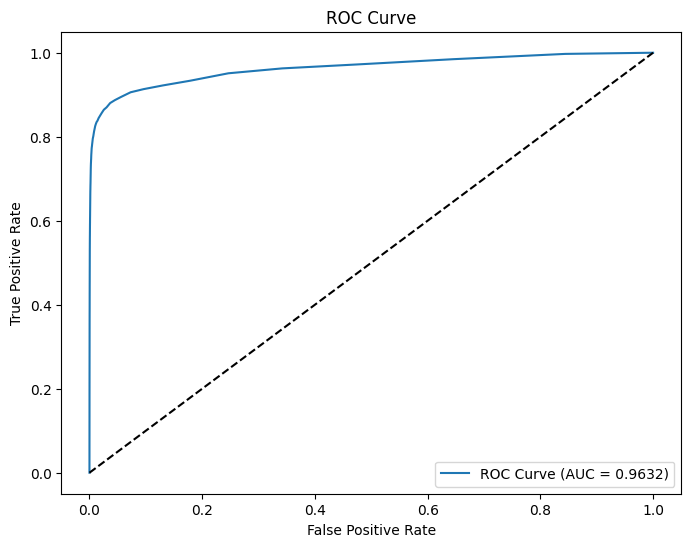

In [45]:
y_prob = rf_model.predict_proba(X_test_sc)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
